## Exploratory Data Analysis (EDA)

We will perform EDA on the scraped dataset. We will use the dataset that has all the data cleaned to perform this analysis. Cleaned reviews are useful to see EDA on token content. We leavrage the plotly and wordcloud packages for this representation.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.io as pio
svg_renderer = pio.renderers["svg"]
svg_renderer.width = 1000
svg_renderer.height = 500
pio.renderers.default = "svg"
import plotly.express as px
import plotly.figure_factory as ff


In [63]:
df = pd.read_csv('../data/cleaned_reviews_1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2896 entries, 0 to 2895
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer Review  2896 non-null   object
 1   Date Of Stay     2893 non-null   object
 2   Customer Rating  2896 non-null   object
 3   Owner Responded  2896 non-null   bool  
dtypes: bool(1), object(3)
memory usage: 70.8+ KB


We would first plot the wordcloud for the entire review set. We use the cleaned review set which has all the stopwords removed. This gives us a . wordcloud that is actually meaningful

In [4]:
words = ''
for review in df['Customer Review']:
    tokens = str(review).split()
    
    words += ' '.join(tokens) + ' '

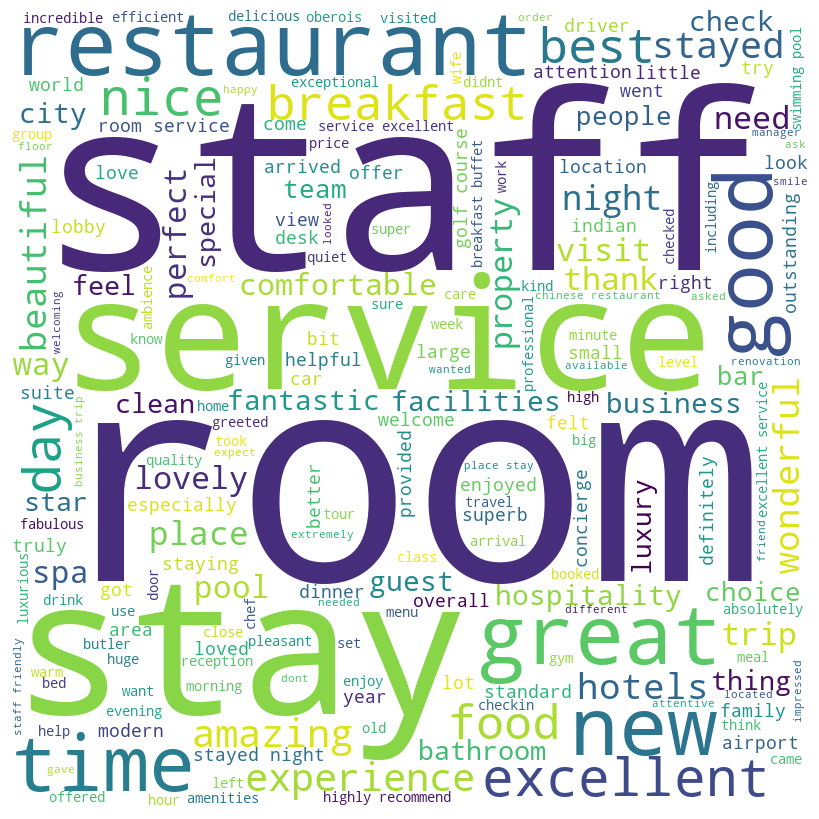

In [11]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                collocations=True,
                min_font_size = 10).generate(words) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

We can also create a wordcloud that only takes in negative reviews. i.e Poor and Terrible rating reviews as below.

In [34]:
negative_rating = ['Poor', 'Terrible']
rslt_df = df.loc[df["Customer Rating"].isin(negative_rating) ]

words = ''
for review in rslt_df['Customer Review']:
    tokens = str(review).split()
    
    words += ' '.join(tokens) + ' '

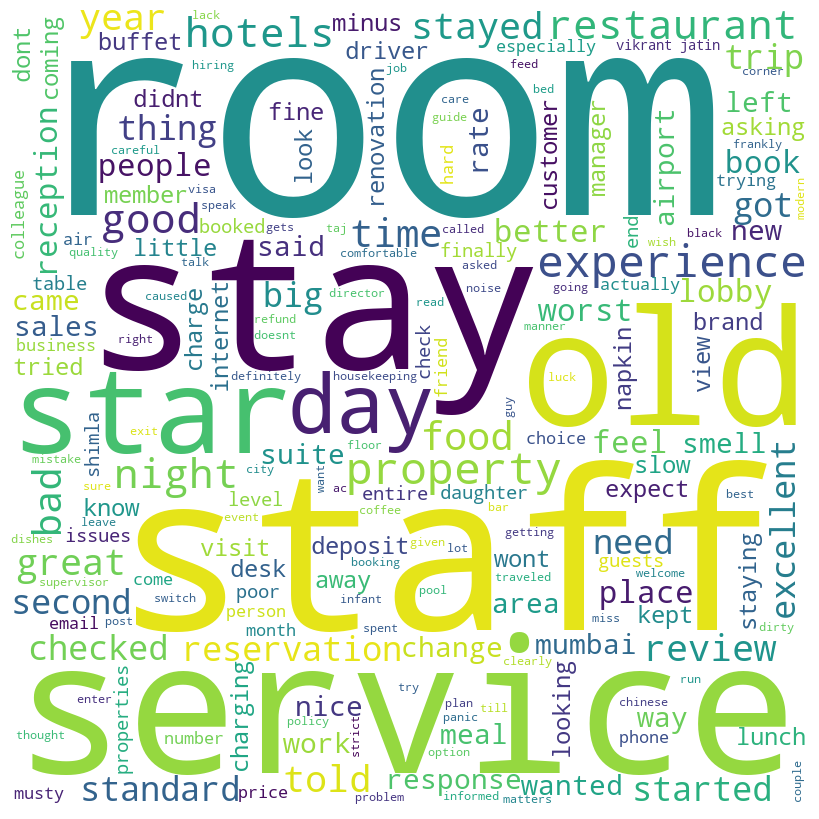

In [35]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                collocations=True,
                min_font_size = 10).generate(words) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Plotting the distribution of reviews based on rating. We observe that the dataset is dominated heavily be "Excellent" reviews. All other classes are minority classes

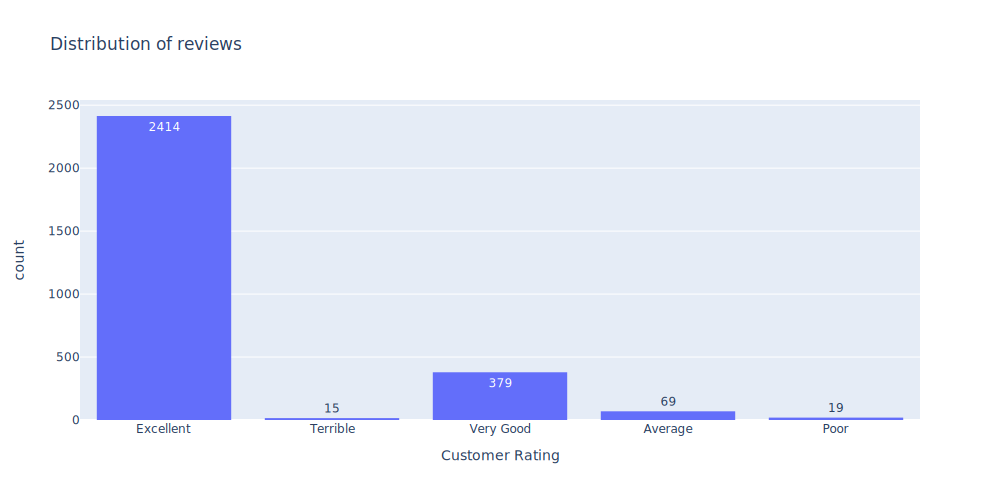

In [6]:
# Plot distribution of review count based on customer ratings
fig = px.histogram(df, 
                    x='Customer Rating', 
                    text_auto=True, 
                    log_y=False,
                    title='Distribution of reviews')
fig.show()

We now create a new column called year using the "Date Of Stay" that was scrapped from the reviews. This gives us a good understanding of how the review distribution has changed over a 5 year period

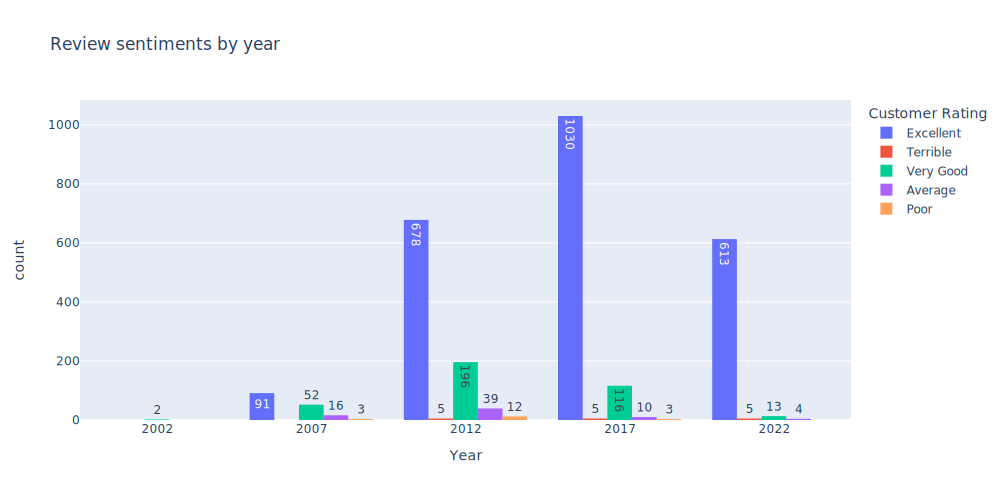

In [12]:

df['Date Of Stay'] = pd.to_datetime(df['Date Of Stay'], format='%m/%y')
df['Year'] = df['Date Of Stay'].dt.year
fig = px.histogram(df, 
                    x='Year', 
                    color='Customer Rating', 
                    text_auto=True, 
                    log_y=False,
                    barmode='group',
                    nbins=5,
                    title='Review sentiments by year')
fig.show()

Calculating average review length for each review rating.

In [80]:
import plotly.io as pio
average_review_length = []
rating = ["Excellent", "Very Good", "Average", "Poor", "Terrible"]
for x in rating :
  rslt_df = df.loc[df["Customer Rating"] == x ]
  rslt_df["Number of Words"] = rslt_df["Customer Review"].apply(lambda n: len(n.split()))
  average_review_length.append(sum(rslt_df['Number of Words']) / len(rslt_df.index))


df2 = pd.DataFrame(list(zip(rating, average_review_length)),
               columns =['Rating', 'Average Review Length'])

Plotting average review length to rating category

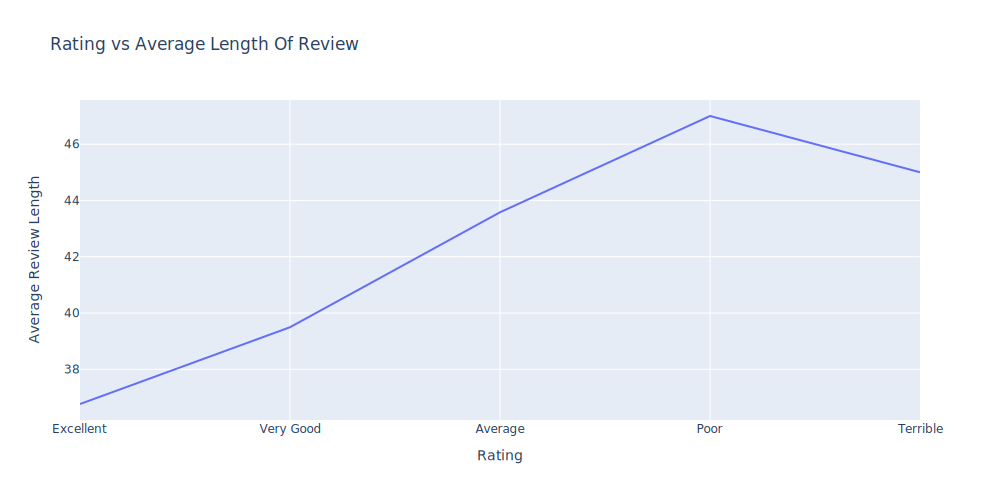

In [86]:
fig = px.line(df2, x="Rating", y="Average Review Length", title='Rating vs Average Length Of Review')
fig.show()